In [34]:
import itertools
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
from dataclasses import asdict, dataclass, field
import vsketch
import shapely.geometry as sg
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd

import vpype_cli
from typing import List, Generic
from genpen import genpen as gp
from scipy import stats as ss
import geopandas
import functools
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# parameters and object generation

typically the full process is something like
1. generate collections of static parameters
2. start loop over static params
3. for each loop
    - calculate dynamic params
    - pass full params to object/geometry generator function
    - update global geometries
    - log params (and attach to individual geometry)
    
would be nice to be able to define static params and procedure for calculating dynamic params all at start
would be nice to be collecting everything in GeoDataFrame

In [21]:
u0 = ss.uniform(loc=1)

In [26]:
u0.rvs()

1.795232336508179

In [55]:
@dataclass
class HatchCircle(gp.DataClassBase):
    x: float
    y: float
    rad: float
    hatch_angle: float
    hatch_spacing: float
    
    def __post_init__(self):
        self.P = gp.Poly(sg.Point((self.x, self.y)).buffer(self.rad))
        self.hatches = self.P.hatch(angle=self.hatch_angle, spacing=self.hatch_spacing)


class MetaPrms(object):
    
    def __init__(
        self,
        n_circles: int,
        xmin: float,
        xmax: float,
        ymin: float,
        ymax: float,
        radloc: float,
        radscale: float,
        hatch_angle: float,
        hatch_spacing: float,
        ):

        self.df = pd.DataFrame({
            'x': np.linspace(xmin, xmax, n_circles),
            'y': np.linspace(ymin, ymax, n_circles),
            'rad': ss.uniform(loc=radloc, scale=radscale).rvs(n_circles),
            'hatch_angle': [hatch_angle] * n_circles,
            'hatch_spacing': [hatch_spacing] * n_circles,
        }
        )
    
        

In [56]:
mprms = MetaPrms(
    n_circles=10,
    xmin=0,
    xmax=10,
    ymin=0,
    ymax=8.5,
    radloc=3,
    radscale=0.1,
    hatch_angle=45,
    hatch_spacing=0.4
)

In [67]:
geoms = []
for i, row in mprms.df.iterrows():
    geoms.append(HatchCircle(**row.to_dict()).P.p)

In [76]:
df = mprms.df.copy()

In [77]:
df['geometry'] = geoms
df = geopandas.GeoDataFrame(df)

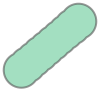

In [80]:
df.unary_union

In [52]:
hc = HatchCircle(x=1, y=0, rad=3, hatch_angle=45, hatch_spacing=0.5)

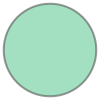

In [119]:
hc.P.p

In [34]:
centers = np.linspace(1,10,10)
rads = 

In [ ]:
for c in centers:
    Point(c).buffer

In [109]:
?ss.uniform

Signature:       ss.uniform(*args, **kwds)
Type:            uniform_gen
String form:     <scipy.stats._continuous_distns.uniform_gen object at 0x7f7a01658730>
File:            ~/anaconda3/envs/genpen/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A uniform continuous random variable.

In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.

As an instance of the `rv_continuous` class, `uniform` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, 